In [702]:

import os
import torch
import gc

gc.collect()
if torch.cuda.is_available():
    torch.cuda.empty_cache()        
    torch.cuda.ipc_collect()


try:
    %run setup_paths
except:
    %run notebooks/setup_paths
    
os.getcwd()

'c:\\Projects\\saliency'

In [703]:
%run src/dataset

isrc = ImagenetSource("imagenet_samples", "*")
all_images = isrc.get_all_images()


[2024-09-09 07:41:50,975  dataset.py:37 - 28392] imagenet base path: imagenet_samples
[2024-09-09 07:41:51,029  dataset.py:40 - 28392] found 4999 images at imagenet_samples\*\*.JPEG


(-0.5, 223.5, 223.5, -0.5)

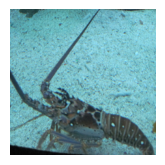

In [852]:
%run src/benchmark
image_name = "ILSVRC2012_val_00012455" ## lobster
#image_name = "ILSVRC2012_val_00000001" ## snake
#image_name = "ILSVRC2012_val_00028649"
image_info = all_images[image_name]
image_path = image_info.path
targetidx = image_info.target
img=Image.open(image_path)
img=img.resize((224,224))  
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.axis('off')


In [853]:
%run src/benchmark
me = ModelEnv('resnet50')

inp = me.get_image(image_path)
logits = me.model(inp).cpu()
topidx = int(torch.argmax(logits))

print(topidx, targetidx)

123 123


In [854]:
sals_dict = {}

[2024-09-09 07:41:53,403  cpe.py:224 - 28392] IpSalCreator: nmasks=500; added = 500
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.13it/s]
[2024-09-09 07:42:01,280  cpe.py:224 - 28392] IpSalCreator: nmasks=1000; added = 500
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.18it/s]
[2024-09-09 07:42:09,093  cpe.py:224 - 28392] IpSalCreator: nmasks=2000; added = 1000
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.55it/s]
[2024-09-09 07:42:25,327  cpe.py:224 - 28392] IpSalCreator: nmasks=4000; added = 2000
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.00it/s]
[2024-09-09 07:43:04,258  cpe.py:229 - 28392] IpSalCreator: total masks=4000;


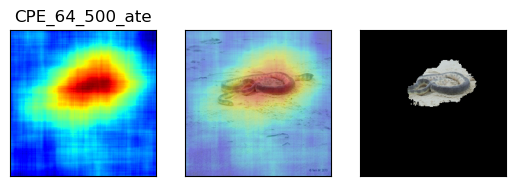

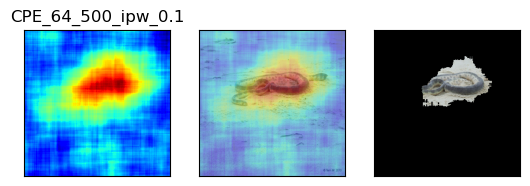

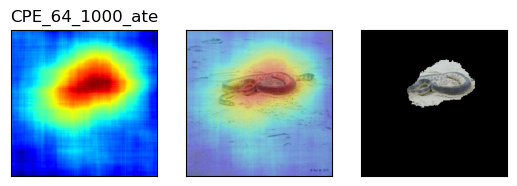

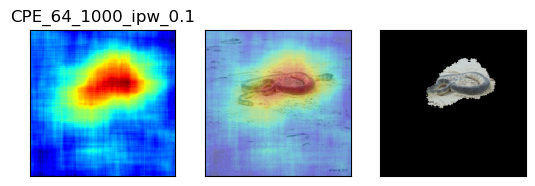

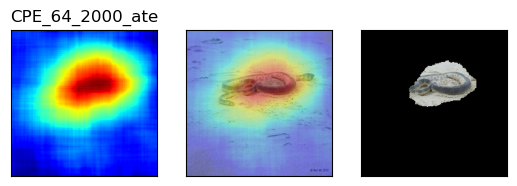

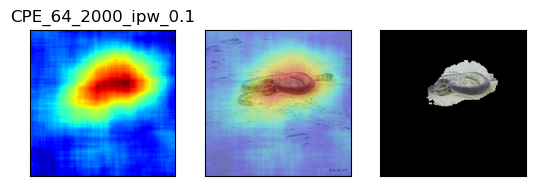

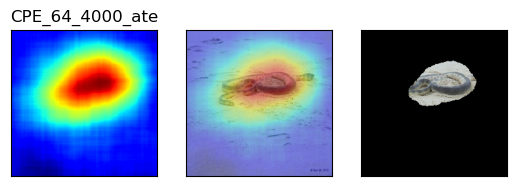

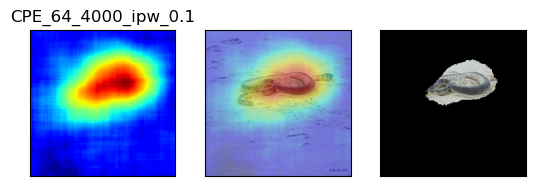

In [707]:
%run src/intutils
%run src/cpe

segsize=64
algo = IpwSalCreator(f"CPE_{segsize}", [500,1000,2000,4000], segsize=segsize, batch_size=32)
res = algo(me, inp, topidx)
show_sal_dict(res, img)
sals_dict.update(res)


[2024-09-09 08:34:27,723  cpe.py:224 - 28392] IpSalCreator: nmasks=500; added = 500
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.45it/s]
[2024-09-09 08:34:35,438  cpe.py:224 - 28392] IpSalCreator: nmasks=1000; added = 500
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.05it/s]
[2024-09-09 08:34:43,413  cpe.py:224 - 28392] IpSalCreator: nmasks=2000; added = 1000
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.11it/s]
[2024-09-09 08:35:12,418  cpe.py:224 - 28392] IpSalCreator: nmasks=4000; added = 2000
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.83it/s]
[2024-09-09 08:36:19,111  cpe.py:229 - 28392] IpSalCreator: total masks=4000;


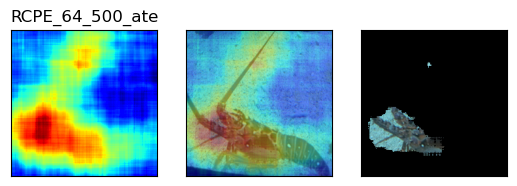

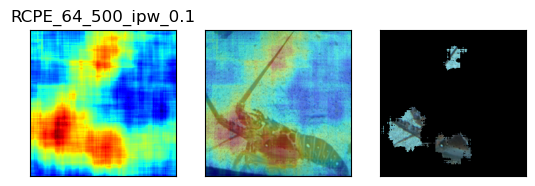

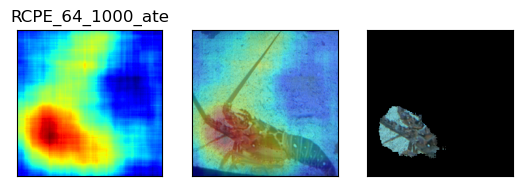

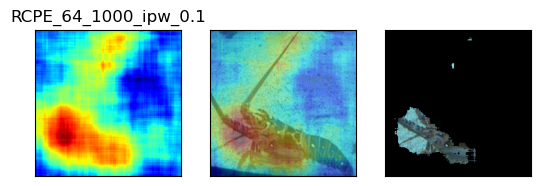

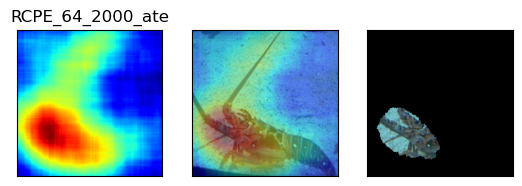

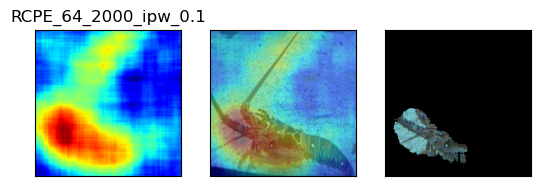

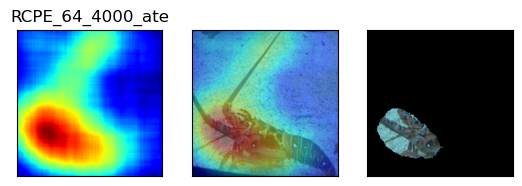

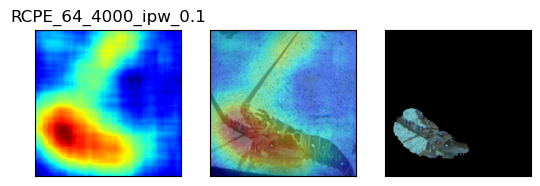

In [855]:
%run src/intutils
%run src/cpe
logging.basicConfig(format='[%(asctime)-15s  %(filename)s:%(lineno)d - %(process)d] %(message)s', level=logging.DEBUG)

segsize=64
algo = IpwSalCreator(f"RCPE_{segsize}", [500,1000,2000,4000], ipwg=RelIpwGen, segsize=segsize, batch_size=32)
res = algo(me, inp, topidx)
show_sal_dict(res, img)
sals_dict.update(res)


In [856]:
for handler in logging.root.handlers[:]:
    logging.root.removeHandler(handler)
logging.basicConfig(format='[%(asctime)-15s  %(filename)s:%(lineno)d - %(process)d] %(message)s', level=logging.DEBUG)
logging.info("hi")
#logging.basicConfig(level=logging.INFO,
#                    format='%(asctime)s - %(levelname)s - %(message)s',
#                    handlers=[logging.StreamHandler()])

# Create a logger object
#logger = logging.getLogger()
#logger.info("ooohi")

[2024-09-09 08:36:25,064  453820311.py:4 - 28392] hi


In [ ]:
scores_dict = get_sal_scores(me, inp, sals_dict)

[2024-09-09 08:36:43,850  benchmark.py:209 - 28392] scores  0, RCPE_64_500_ate, 0.03727630386187308, 0.7131822037876451
[2024-09-09 08:37:03,409  benchmark.py:209 - 28392] scores  0, RCPE_64_500_ipw_0.1, 0.03665485048377774, 0.7199487383326674
[2024-09-09 08:37:21,525  benchmark.py:209 - 28392] scores  0, RCPE_64_1000_ate, 0.05065078509489597, 0.69398578507701
[2024-09-09 08:37:36,935  benchmark.py:209 - 28392] scores  0, RCPE_64_1000_ipw_0.1, 0.048222668885692536, 0.7157034605770605
[2024-09-09 08:37:53,633  benchmark.py:209 - 28392] scores  0, RCPE_64_2000_ate, 0.05194195384670256, 0.7171741825992025


In [748]:

%run src/cpe

simp = SimpGen(64, collect_masks=True)
simp.gen(me.narrow_model(topidx), inp, 1000)


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.60it/s]


In [749]:
sal = simp.get_ate_sal()
sal.shape

torch.Size([1, 224, 224])

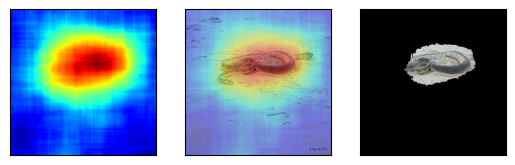

In [750]:
showsal(sal[0].cpu(), img)

In [751]:
all_masks = torch.concat(simp.all_masks)
all_masks.shape

sobel_size=63
ndist = 31

In [752]:
## Prewitt Sobel and Scharr gradient 5x5 convolution matrices
## Expansion and implementation of a 3x3 soble
def gsobel(K):    
    arng = torch.arange(K, dtype=torch.float32)
    offs = arng-arng.mean()
    dist = offs.abs()    
    return torch.nan_to_num(offs / (dist.unsqueeze(0)**2 +  dist.unsqueeze(1)**2),0)

sblx = gsobel(sobel_size)
sblx = gsobel(5)
sbly = sblx.transpose(0,1)
sblx

tensor([[-0.2500, -0.2000,  0.0000,  0.2000,  0.2500],
        [-0.4000, -0.5000,  0.0000,  0.5000,  0.4000],
        [-0.5000, -1.0000,  0.0000,  1.0000,  0.5000],
        [-0.4000, -0.5000,  0.0000,  0.5000,  0.4000],
        [-0.2500, -0.2000,  0.0000,  0.2000,  0.2500]])

In [753]:
import torch.nn.functional as F
isal = sal.cpu()
print(isal.shape)
ctx = F.conv2d(isal.unsqueeze(0), sblx.unsqueeze(0).unsqueeze(0), padding="same")[0,0]
cty = F.conv2d(isal.unsqueeze(0), sbly.unsqueeze(0).unsqueeze(0), padding="same")[0,0]

torch.Size([1, 224, 224])


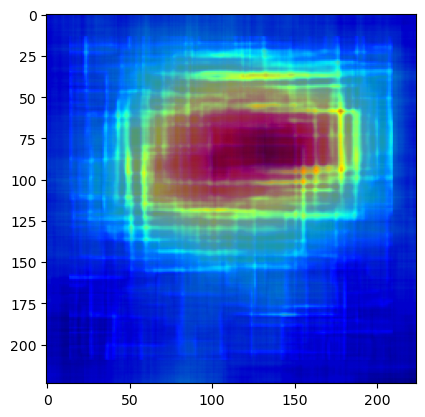

In [754]:
grad = (ctx**2 + cty**2)
pad = 14
zzz = torch.zeros(grad.shape)
zzz[ pad:-pad, pad:-pad]=grad[ pad:-pad, pad:-pad]
plt.imshow(zzz, cmap="jet")
plt.imshow(isal[0], cmap="jet", alpha=0.6)

In [755]:
csz = (ctx**2 + cty**2).sqrt()
cszbar = torch.quantile(csz, 0.1)
#torch.quantile(csz, 0.6)
dist = ndist
offsx = (ctx*dist/csz).to(torch.int32)
offsy = (cty*dist/csz).to(torch.int32)
#offsx[175,25]


In [845]:
H, W = 224,224
idxx = offsx + torch.arange(W).unsqueeze(0)
idxy = offsy + torch.arange(H).unsqueeze(1)
isok = ((csz > cszbar) & (idxx >= 0) & (idxx < W) & (idxy >= 0) & (idxy < H))
isok.sum() / (H*W)

tensor(0.8281)

In [846]:
msk = all_masks[1]
bmasks = all_masks[0:32]
msk.shape

torch.Size([224, 224])

In [847]:
torch.minimum(torch.arange(10), torch.tensor([8]))

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 8])

In [848]:
confidx = torch.maximum(torch.minimum(idxx.flatten()+idxy.flatten()*W, torch.tensor(H*W-1)), torch.tensor([0]))

mvals = msk.flatten().gather(0, confidx).reshape(msk.shape)

In [849]:
gidx = ((torch.arange(bmasks.shape[0]) * confidx.numel()).unsqueeze(1) + confidx.unsqueeze(0)).flatten()
ref = bmasks.flatten().gather(0, gidx).reshape(bmasks.shape)
print(ref.shape)


torch.Size([32, 224, 224])


tensor([[ 71, 121],
        [ 70, 108],
        [ 72, 124],
        ...,
        [ 93,  97],
        [ 95,  92],
        [ 95,  93]])


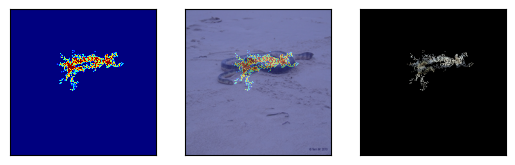

In [850]:
roffs = torch.stack((idxy, idxx), dim=2)
paint = roffs[highlight]
print(paint)
vvv = mmm
vvv=torch.zeros(vvv.shape)
for py, px in paint:
    vvv[py,px]=200
#vvv=vvv.scatter(0, paint, 200)
showsal(vvv,img)

torch.Size([224, 224])


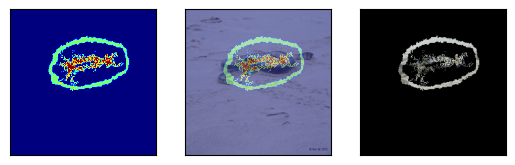

In [851]:
mmm = torch.zeros(isal[0].shape)
highlight = (isal[0] >= 3.5) & (isal[0] <= 4)
mmm[highlight] = 100
#vvv=torch.zeros(mmm.shape).flatten()
vvv = mmm.flatten()
parts = confidx[vvv==100]
#vvv=torch.zeros(mmm.shape).flatten()
#print(len(parts))
#print(parts)
vvv=vvv.scatter(0, parts, 200*torch.ones(vvv.shape))
vvv =vvv.reshape(mmm.shape)
print(vvv.shape)
showsal(vvv,img)

In [762]:
if False:
    ooo = torch.arange(12).reshape(3,2,2)

    print(ooo)

    xi = torch.tensor([[0,0],[1,1]])
    yi = torch.tensor([[0,0],[0,1]])

    pos = yi.flatten()*2 + xi.flatten()
    print(pos)

    gidx = ((torch.arange(ooo.shape[0]) * pos.numel()).unsqueeze(1) + pos.unsqueeze(0)).flatten()
    print(gidx)
    ref = ooo.flatten().gather(0,gidx).reshape(ooo.shape)
    ref

    #ooo.flatten(1).gather(1, ppp.unsqueeze(0)).reshape(ooo.shape)

In [763]:
#mbin 

icats = torch.arange(4).unsqueeze(-1).unsqueeze(-1).unsqueeze(-1)
gidx = None
prev_bmask_shape = None
s_saliency = None
s_weights = None

for idx, bmasks in enumerate(simp.all_masks):
    
    if bmasks.shape != prev_bmask_shape:
        gidx = ((torch.arange(bmasks.shape[0]) * confidx.numel()).unsqueeze(1) + confidx.unsqueeze(0)).flatten()
        prev_bmask_shape = bmasks.shape
        
    ref = bmasks.flatten().gather(0, gidx).reshape(bmasks.shape)
    mout = simp.all_pred[idx]
    #print(mout)
    #print(bmasks.shape)
    ref = bmasks.flatten().gather(0, gidx).reshape(bmasks.shape)
    cat = ((bmasks > 0.5) * 1 + (ref > 0.5) * 2).unsqueeze(0)
    
    mbin = (icats == cat)
    #print(cat.shape, mout.shape, mbin.shape)
    saliency = (mout.squeeze(1).unsqueeze(0) * mbin).sum(dim=1)
    #print(mbin.shape)
    weights = mbin.sum(dim=1)    
    if s_saliency is None:
        s_saliency = saliency
        s_weights = weights
    else:
        s_saliency += saliency
        s_weights += weights
    #break    
    #print(mbin.shape)
    #break
    
s_saliency.shape, s_weights.shape

(torch.Size([4, 224, 224]), torch.Size([4, 224, 224]))

In [764]:
cidx = torch.arange(4)
treatment_sal = s_saliency[(cidx & 1) == 1]
control_sal = s_saliency[(cidx & 1) == 0]
p_treatment_weights = s_weights[(cidx & 1) == 1]
p_control_weights = s_weights[(cidx & 1) == 0]

clip = 0.1
t_clipping = torch.tensor([clip])    
c_clipping = torch.tensor([clip])    

treatment_prob =  torch.max(p_treatment_weights / (p_treatment_weights + p_control_weights + 1), t_clipping)
control_prob =  torch.max(p_control_weights / (p_treatment_weights + p_control_weights + 1), c_clipping)

ipw = (
    ((treatment_sal / treatment_prob).sum(dim=0) / (p_treatment_weights / treatment_prob).sum(dim=0)) -
    ((control_sal / control_prob).sum(dim=0) / (p_control_weights / control_prob).sum(dim=0)) ).unsqueeze(0)            

ipw.shape
#treatment_prob.shape, p_treatment_weights.shape, p_control_weights.shape, t_clipping.shape

torch.Size([1, 224, 224])

In [765]:
cate = (s_saliency[(cidx & 1) == 1].sum(dim=0) / s_weights[(cidx & 1) == 1].sum(dim=0)) - (s_saliency[(cidx & 1) == 0].sum(dim=0)/s_weights[(cidx & 1) == 0].sum(dim=0))
ipw.shape, isal.shape

(torch.Size([1, 224, 224]), torch.Size([1, 224, 224]))

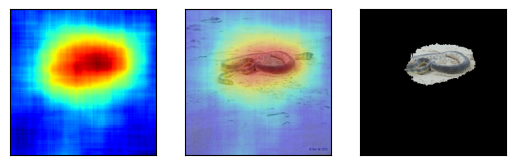

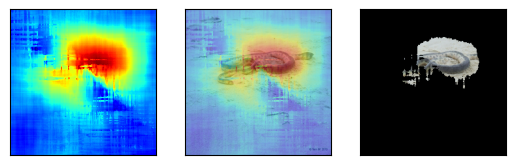

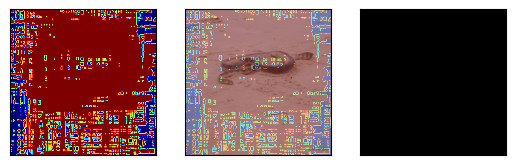

In [766]:
fsal = isal * (~isok) + ipw * (isok)
showsal(cate, img)
showsal(fsal[0], img)
showsal(isok*1.0, img)


In [767]:
import logging

logging.basicConfig(format='[%(asctime)-15s  %(filename)s:%(lineno)d - %(process)d] %(message)s', level=logging.DEBUG)

sals_dict = dict(ipw=fsal, ate=isal)
scores_dict = get_sal_scores(me, inp, sals_dict)


[2024-09-09 07:57:08,633  benchmark.py:209 - 28392] scores  0, ipw, 0.03547099258442137, 0.5559969515202933
[2024-09-09 07:57:25,217  benchmark.py:209 - 28392] scores  0, ate, 0.047383643430904954, 0.5221245630091289


In [768]:
for key, stats in scores_dict.items():
    print(key, stats["del_auc"], stats["ins_auc"]), 
    

ipw 0.03547099258442137 0.5559969515202933
ate 0.047383643430904954 0.5221245630091289


In [769]:
#run src/adaptors
#import pytorch_grad_cam 
#dir(pytorch_grad_cam)

ddd = [1,2,3]
import random
random.shuffle(ddd)
ddd

[2, 1, 3]

In [770]:
ee= 1000
f"{ee:x}"

'3e8'